<a href="https://colab.research.google.com/github/alexandreib/QuantDesign/blob/main/1_SP500_Portfolio_Allocation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Portfolio Optimization on S&P 500 Stocks**

This notebook focuses on optimizing investment portfolios using S&P 500 stocks through a structured approach.

***Contents :***

**Data Acquisition:** Scrape and download historical stock data.

**Data Preparation:** Calculate returns and covariance matrix for the selected stocks.

**Portfolio Generation:** Create various portfolio strategies (Random Portfolios, Mean-Variance , Minimum Variance , Maximize Sharpe Ratio )

<br>

This framework aims to identify optimal portfolio allocations that balance risk and return effectively.

<br>

Imports :


In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Download the Stocks Returns


## Scraping SP500 Tickers

In [ ]:
# Download the S&P 500 constituents from Wikipedia
try:
    table=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    df = table[0]
    tickers = df['Symbol'].tolist()
except Exception as e:
    print(f"Error downloading S&P 500 tickers: {e}")
    tickers = [] # Handle the error gracefully, e.g., provide a default list

# Print or use the tickers list
print(tickers)

['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'A', 'APD', 'ABNB', 'AKAM', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AMTM', 'AEE', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ADM', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'AXON', 'BKR', 'BALL', 'BAC', 'BAX', 'BDX', 'BRK.B', 'BBY', 'TECH', 'BIIB', 'BLK', 'BX', 'BK', 'BA', 'BKNG', 'BWA', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF.B', 'BLDR', 'BG', 'BXP', 'CHRW', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'COR', 'CNC', 'CNP', 'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CPAY', 'CTVA', 'CSGP', 'COST', 'CTRA', 'CRWD', 'CCI', 'CSX', 'CMI', 'CVS', 'DHR', '

## Download the last 20 years of price

In [ ]:
# Define the start and end dates for the data
end_date = pd.Timestamp.today()
start_date = end_date - pd.Timedelta(days=365 * 20)

# Download the data
df = yf.download(tickers, start=start_date, end=end_date)

# Print the data (optional)
df.head()

[*********************100%***********************]  503 of 503 completed
ERROR:yfinance:
2 Failed downloads:
ERROR:yfinance:['BF.B']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2004-11-20 08:55:09.723240 -> 2024-11-15 08:55:09.723240)')
ERROR:yfinance:['BRK.B']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Price                      Adj Close                                           \
Ticker                             A      AAPL ABBV ABNB        ABT      ACGL   
Date                                                                            
2004-11-22 00:00:00+00:00  13.932311  0.924136  NaN  NaN  12.937847  4.327778   
2004-11-23 00:00:00+00:00  13.781404  0.922931  NaN  NaN  12.750740  4.353333   
2004-11-24 00:00:00+00:00  13.992677  0.964807  NaN  NaN  12.792993  4.334444   
2004-11-26 00:00:00+00:00  13.980603  0.972339  NaN  NaN  12.853350  4.361111   
2004-11-29 00:00:00+00:00  13.914207  1.030935  NaN  NaN  12.805061  4.358889   

Price                                                                  ...  \
Ticker                           ACN       ADBE        ADI        ADM  ...   
Date                                                                   ...   
2004-11-22 00:00:00+00:00  17.893869  29.717941  24.764505  13.196256  ...   
2004-11-23 00:00:00+00:00  17.865511  30.322695  24.519382  13.265743  ...   
2004-11-24 00:00:00+00:00  18.326332  30.422657  24.456520  13.373133  ...   
2004-11-26 00:00:00+00:00  18.390137  30.317699  24.324526  13.404716  ...   
2004-11-29 00:00:00+00:00  18.390137  30.357685  23.677130  13.411027  ...   

Price                      Volume                                          \
Ticker                        WTW      WY     WYNN      XEL       XOM XYL   
Date                                                                        
2004-11-22 00:00:00+00:00  300037  822400  1131200  1277500  11662200 NaN   
2004-11-23 00:00:00+00:00  254737  954400  1199600  1674000  14183000 NaN   
2004-11-24 00:00:00+00:00  267874  667800   744600   676500   9616200 NaN   
2004-11-26 00:00:00+00:00   70668  388900   168900   310000   4497700 NaN   
2004-11-29 00:00:00+00:00  429821  931400   525800   754800  10090700 NaN   

Price                                                    
Ticker                         YUM      ZBH    ZBRA ZTS  
Date                                                     
2004-11-22 00:00:00+00:00  2103748  1396268  454400 NaN  
2004-11-23 00:00:00+00:00  4367462  2075347  611200 NaN  
2004-11-24 00:00:00+00:00  2816497   822455  321800 NaN  
2004-11-26 00:00:00+00:00   988166   315798  100000 NaN  
2004-11-29 00:00:00+00:00  3831927  1763154  612000 NaN  

[5 rows x 3018 columns]

## Reshape, and Clean the DataFrame

In [ ]:
# Reshape the DataFrame
df = df['Adj Close'].reset_index()
df = pd.melt(df, id_vars='Date', value_vars=tickers, var_name='Ticker', value_name='Adj Close')
df['Date'] = pd.to_datetime(df['Date']).dt.date
df = df.rename(columns={'index': 'Ticker'})

# Print or use the transformed DataFrame
df.to_csv('/content/drive/MyDrive/QuantDesign/sp500_20years.csv', index=False)
df.head()

,Date,Ticker,Adj Close
0,2004-11-22,MMM,37.598114
1,2004-11-23,MMM,37.365273
2,2004-11-24,MMM,37.369934
3,2004-11-26,MMM,37.328022
4,2004-11-29,MMM,37.253529


# Prepare the Returns

## Log Returns

Using log returns instead of simple returns offers several advantages:

- **Time Additivity:**  
  Log returns can be summed over different periods for cumulative return calculations, unlike simple returns.

- **Compounding:**  
  Log returns naturally account for compounding, providing a more accurate measure of investment growth.

- **Normality Assumption:**  
  Log returns are often more normally distributed, aiding statistical modeling and risk management.

- **Symmetry:**  
  Log returns treat gains and losses symmetrically, better reflecting the continuous nature of returns.


In [ ]:
# Calculate daily log returns
df['Daily_Log_Return'] = np.log(df['Adj Close'] / df['Adj Close'].shift(1))

# # Calculate quarterly log returns Using the first advantage of log Rturns : Tie Additivity
df['Quarterly_Log_Return'] = df.groupby('Ticker')['Daily_Log_Return'].rolling(window=63, min_periods=1).sum().reset_index(0,drop=True)

# Creation of the log return Matrix
log_returns_matrix = pd.pivot_table(df[['Date','Ticker', 'Quarterly_Log_Return']], index ='Date', columns = 'Ticker', aggfunc='mean')
log_returns_matrix = log_returns_matrix.droplevel(0, axis = 'columns')
log_returns_matrix.head(1)


Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2004-11-22,-2.063356,-3.196846,NaN,NaN,-1.730303,-2.524485,-2.249161,-2.500087,-1.074865,-2.025737,...,0.085271,-1.62545,-2.310358,-2.383961,-1.830196,NaN,-2.394679,-1.752339,-0.966838,NaN


## Shrinked Covariance Matrice

In situations with many variables and skewed data, using a shrinkage covariance matrix is typically the better choice.
Here's why, we will use the Shrinkage Covariance Matrix :

1.  **High Dimensionality:** When the number of variables is large relative to the number of observations, the standard covariance matrix can become unstable and lead to overfitting. Shrinkage helps to stabilize these estimates.

2.   **Skewed Data:** Skewed data can affect the estimation of the covariance matrix. Shrinkage techniques can provide more robust estimates by incorporating prior information or adjusting the influence of extreme values.

3.   **Variance Reduction:** Shrinkage methods reduce the variance of the covariance estimates, which is particularly beneficial in high dimensions. This can improve the reliability of downstream analyses, such as portfolio optimization or classification.

4.  **Bias-Variance Trade-off:** While shrinkage introduces some bias, it often results in a lower mean squared error compared to the traditional covariance matrix, especially in high-dimensional contexts.


In [ ]:
def calculate_shrink_cov_matrix (df) :
    masked_arr = np.ma.array(df, mask=np.isnan(df))
    cov_numpy = np.ma.cov(masked_arr, rowvar=False, allow_masked=True, ddof=1).data
    n_samples, n_features = df.shape
    alpha = np.mean(cov_numpy**2)
    mu = np.trace(cov_numpy) / n_features
    mu_squared = mu**2
    num = alpha + mu_squared
    den = (n_samples + 1) * (alpha - mu_squared / n_features)
    shrinkage = 1.0 if den == 0 else min(num / den, 1.0)
    shrunk_cov = (1.0 - shrinkage) * cov_numpy
    shrunk_cov.flat[:: n_features + 1] += shrinkage * mu
    return shrunk_cov

covariance_matrix = calculate_shrink_cov_matrix(log_returns_matrix)



## Prepare data

We take the last quarter return, considering the momentum is strong enough to have similars returns the next quarter.

We will take for returns only the positive past quarter returns (it’s safe assumption that we will not invest in stocks which we assume will have negative returns).

Let do the random allocation again with only the positive expected returns.


In [ ]:
# Filter returns
log_returns = log_returns_matrix.iloc[-1]
log_returns = log_returns[log_returns > 0]

#get list of tickers
l_tickers = list(log_returns.index)

number_of_tickers = len(l_tickers)
# Out of Curiositry how many stock where with positive returns in the SP500 in the last quarter :
print(f"number_of_tickers with postivie returns in the last quarter : {number_of_tickers}")

# Store the individual stock standard deviation for future use
std_dev_individual_stocks = log_returns_matrix[l_tickers].std()

# Recalculate teh covariance Matrice
covariance_matrix = calculate_shrink_cov_matrix(log_returns_matrix[l_tickers])

number_of_tickers with postivie returns in the last quarter : 344


# Portfolio Allocation

## Random Portfolio allocation

In the next paragraph we will randomly assign weight to the different stocks, and calcualte the return, standard deviation, and sharpe ratio.

We do that for 5000 simulations and plot the results.

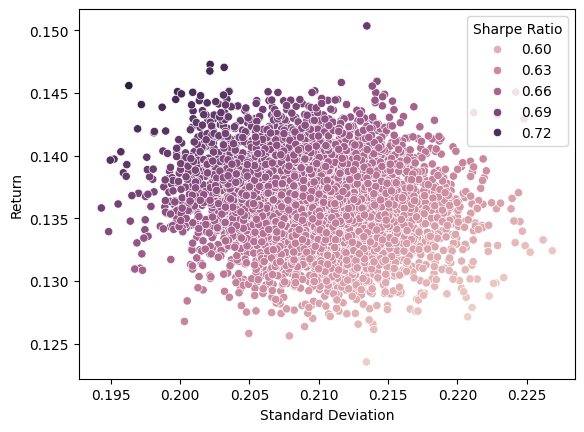

In [ ]:
l_results = []
for idx in range(5000):
    weights = np.array(np.random.random(number_of_tickers))
    weights = weights / np.sum(weights) ## weights total < 1

    Returns = np.sum(log_returns * weights)
    Standard_Deviation = np.sqrt(np.dot(weights.T, np.dot(covariance_matrix, weights)))
    Sharpe_Ratio = Returns/Standard_Deviation
    Model = 'Random allocation'
    l_results.append([Returns, Standard_Deviation, Sharpe_Ratio, Model])

results = pd.DataFrame(l_results, columns = ['Return', 'Standard Deviation', 'Sharpe Ratio', 'Model'])

sns.scatterplot(results, x='Standard Deviation',  y='Return', hue = 'Sharpe Ratio')
plt.show()

What is the average Sharpe ratio, return and standard deviation in the above simulation

In [ ]:
results_mean = results[['Return', 'Standard Deviation', 'Sharpe Ratio']].mean()
display(results_mean)

,0
Return,0.136318
Standard Deviation,0.209685
Sharpe Ratio,0.650496


The random weight allocation portfolio demonstrate significant variability, highlighting the unpredictability of returns without a strategic approach. While it serves as a useful benchmark, it underscores the importance of informed asset selection to achieve consistent performance and risk management.

## Optimized Portfolio Allocation

**Mean Variance Optimization :**

 $\qquad$ Mean-variance portfolio optimization is a method for constructing portfolios that maximize returns for a given risk level or, conversely, minimize risk for a given expected return. It balances the trade-off between return and risk by optimizing asset weights in a portfolio.

The optimization problem can be formulated as:

- **Objective, Maximize : $$R_p - \lambda \cdot \sigma_p^2$$**

where:
- - $R_p = \sum_{i=1}^{n} w_i \cdot R_i$ Portfolio return.
    - $w$ : Weight of the portfolio
    - $R_i$ : Return of invdividual stock
    
- $\sigma_p^2 = w^T \Sigma w $ : Portfolio variance (risk).
    - $\Sigma$ : Covariance Matrice
- $\lambda $ : Risk aversion parameter, where higher values prioritize minimizing risk.

Solving this problem yields the optimal asset weights, creating a portfolio on the **efficient frontier**—the set of portfolios with the best return-risk trade-off.

<br>

**Sharpe Ratio Optimization :**


 $\qquad$ The Sharpe Ratio is a metric that helps investors understand the return on an investment relative to its risk. It considers not just how much an investment is expected to earn but also how much volatility or risk is involved to achieve those returns. A higher Sharpe Ratio indicates a more attractive investment, as it suggests that the investment provides better returns for the amount of risk taken. This ratio is widely used because it enables comparison across different investments, helping investors identify those that are likely to offer the best risk-adjusted returns.

To optimize the Sharpe ratio, you typically want to maximize the following objective function:

$$
S = \frac{R_p - R_f}{\sigma_p}
$$
- **Where**:
  - $S$ : Sharpe ratio
  - $R_p$ = Portfolio return
  - $R_f$ = Risk-free rate (to be defined)
  - $\sigma_p$ = Portfolio standard deviation (risk)


<br>

The optimization problem can be framed as follows:

**Objective, Maximize :**$$S = \frac{\sum_{i=1}^{n} w_i \cdot R_i - R_f}{\sqrt{w^T \Sigma w}}$$

**Subject to**:
- $\sum_{i=1}^{n} w_i = 1 $
- $w_i \geq 0 $

<br>


As it's difficult problem to resolve with a simple solver, we can have 3 ways to optimize the sharpe ratio :

1.   Following Tütüncü (section 5.2), "Advanced Lecture on Mathematical Science and Information Science I" this can be reformulated under a change of variables to a simpler quadratic optimisation problemm.

    **Minimize:** $y^TQy$
    
    **Subject to**:
    - $\hat{μ}Ty=1$
    - $\hat{A}y \geq 0$
    - $ 0 \leq y$

We will not solve this as we are using scipy who can directly optimize the sharpe ratio.


2.   Use Minimum Variance portfolio optimization and plot the efficient frontier, pick the point which is graphically the best Sharpe Ratio.

3. Use a nonlinear programming (NLP) solve (scipy).

### Objectives functions

The scipy.optimize.minimize function is useful for finding the minimum of scalar functions with or without constraints.

[Link to scipy library](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html)

In [ ]:
def calculate_portfolio_variance(weights, cov_matrix):
    return np.dot(weights.T, np.dot(cov_matrix, weights))

def calculate_portfolio_returns(weights, returns):
    return np.dot(weights, returns)

def variance_objective(weights, cov_matrix):
    portfolio_variance = np.squeeze(calculate_portfolio_variance(weights, cov_matrix))
    return portfolio_variance

### Using Negative Markowitz Objective, as we will use scipy.optimize.minimize
def neg_markowitz_objective(weights, returns, cov_matrix, gamma = 0.2):
    portfolio_returns = np.squeeze(calculate_portfolio_returns(weights, returns))
    portfolio_variance = np.squeeze(calculate_portfolio_variance(weights, cov_matrix))
    return gamma * portfolio_variance - portfolio_returns

### Using Negative Sharpe Ratio, as we will use scipy.optimize.minimize
def neg_sharpe_ratio_objective(weights, returns, cov_matrix, risk_free_rate = 0.03):
    portfolio_returns = np.squeeze(calculate_portfolio_returns(weights, returns))
    portfolio_variance = np.squeeze(calculate_portfolio_variance(weights, cov_matrix))
    return -((portfolio_returns - risk_free_rate)/np.sqrt(portfolio_variance))

###**1. Maximize : Mean - Variance**

 $\qquad$ The Mean-Variance Portfolio approach focuses on creating a balance between expected return and risk. By carefully selecting and weighting different assets, this method aims to maximize returns for a specified level of risk or, alternatively, minimize risk for a target return. It considers both the individual performance of assets and how they interact with each other, accounting for factors like correlation and volatility. In essence, the Mean-Variance Portfolio seeks an optimal mix of assets that offers the best possible return given the level of risk an investor is willing to accept, forming the basis for efficient, diversified investing.

In [ ]:
result = sp.optimize.minimize(fun=neg_markowitz_objective,
                            args=(log_returns, covariance_matrix),
                            x0= np.array([1/number_of_tickers for _ in range(number_of_tickers)]),
                            method='SLSQP',
                            bounds=tuple((0, 0.3) for _ in range(number_of_tickers)),## we don't want to have more than 30% of the portfolio on 1 asset
                            constraints=({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})
                            )

print(result)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.6349720310693132
       x: [ 1.041e-15  3.155e-16 ...  6.136e-16  3.085e-16]
     nit: 7
     jac: [-8.587e-03 -1.400e-01 ...  1.572e-03 -1.301e-01]
    nfev: 2415
    njev: 7


The optimization ended positively, let's print the results, and largest weights (above 0.01) :

Sharpe Ratio: 3.185
Portfolio Return: 0.643
Portfolio Standard Deviation: 0.202


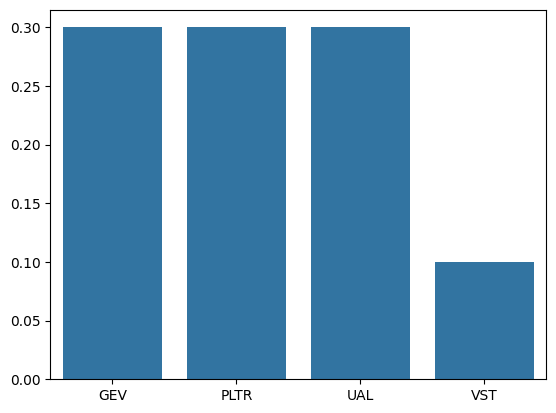

In [ ]:
markowitz = -1 * result['fun']

weights =  result['x']
portfolio_return = weights @ log_returns
portfolio_std_dev = np.sqrt(weights.T @ covariance_matrix @ weights)
sharpe_ratio = portfolio_return / portfolio_std_dev

results = pd.concat([results, pd.DataFrame([[portfolio_return,  portfolio_std_dev, sharpe_ratio, 'Mean Variance optimized']], columns = results.columns)])
print(f"Sharpe Ratio: {sharpe_ratio:.3f}")
print(f"Portfolio Return: {portfolio_return:.3f}")
print(f"Portfolio Standard Deviation: {portfolio_std_dev:.3f}")

# Let's plot the Weights > 0.01
sns.barplot(y=weights[weights >= 0.01], x = list(log_returns.index[weights >= 0.01]))
plt.show()

###**2. Minimize : Variance**

 $\qquad$ The Minimum Variance Portfolio is designed to minimize overall risk by carefully balancing asset weights, regardless of expected return. Instead of focusing on maximizing profits, this portfolio approach seeks to create the least risky combination of assets. It does this by including assets that, when combined, offset each other's price movements—essentially reducing the portfolio’s sensitivity to market volatility. The result is a portfolio that prioritizes stability and seeks the lowest possible risk while remaining invested in a diverse set of assets.

In [ ]:
result = sp.optimize.minimize(fun=calculate_portfolio_variance,
                                x0 = np.array([1/number_of_tickers for _ in range(number_of_tickers)]),
                                args=(covariance_matrix),
                                method='SLSQP',
                                bounds=tuple((0, 0.3) for _ in range(len(log_returns))),
                                constraints=({'type': 'eq', 'fun': lambda x: np.sum(x) - 1}))
print(result)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.001784715335388003
       x: [ 3.538e-18  0.000e+00 ...  2.789e-18  0.000e+00]
     nit: 34
     jac: [ 8.116e-03  6.493e-03 ...  6.136e-03  8.891e-03]
    nfev: 11730
    njev: 34


The optimization ended positively, let's print the results, and largest weights (above 0.01) :

Sharpe Ratio: 2.744
Portfolio Return: 11.6 % 
Portfolio Standard Deviation: 0.042


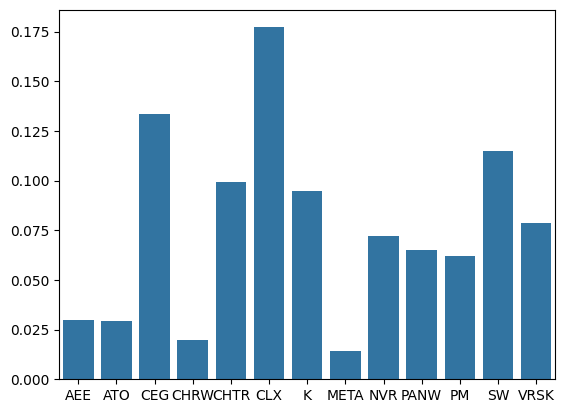

In [ ]:
variance = -1 * result['fun']
weights =  result['x']
portfolio_return = weights @ log_returns
portfolio_std_dev = np.sqrt(weights.T @ covariance_matrix @ weights)
sharpe_ratio = portfolio_return / portfolio_std_dev # calculation the same sharpe ratio for all models

results = pd.concat([results, pd.DataFrame([[portfolio_return, portfolio_std_dev, sharpe_ratio, 'Variance optimized']], columns = results.columns)])
print(f"Sharpe Ratio: {sharpe_ratio:.3f}")
print(f"Portfolio Return: {portfolio_return * 100:.1f} % ")
print(f"Portfolio Standard Deviation: {portfolio_std_dev:.3f}")

# Let's plot the Weights > 0.01
sns.barplot(y=weights[weights >= 0.01], x = list(log_returns.index[weights >= 0.01]))
plt.show()

***Efficiency Frontier***

 $\qquad$ The Efficient Frontier represents the set of optimal portfolios that offer the best possible return for a given level of risk. Imagine it as a curve that plots the most efficient portfolios from all possible combinations of assets—where each point on this curve reflects a unique risk-return balance.

 Portfolios below the frontier are suboptimal, as they either take on too much risk for their returns or achieve lower returns than possible for their risk level. By choosing a portfolio on the Efficient Frontier, investors can ensure they’re maximizing returns without taking unnecessary risks, making it a key concept in portfolio optimization.


 To calculate the Efficiency Frontier, we can define a target return, and had that constraint to the solver.
 We will then calculate the minimum variance, with the target return.
 Doing the aboves steps for multiple target returns, from minimum to maximum returns will draw a line of all the most efficient portfolio allocation with the minimum variance.



In [ ]:
std_dev = []
returns = []
sr = []
model = []

# Adding more point around the minimum returns to have a better vizualization
x = np.linspace(0.035, log_returns.max()+0.02, 20)

# Calculating the minimum variances for all target returns and store teh results in list
for i, one_return in enumerate(x):
    result = sp.optimize.minimize(fun=calculate_portfolio_variance,
                                x0 = np.array([1/number_of_tickers for _ in range(number_of_tickers)]),
                                args=(covariance_matrix),
                                  method='SLSQP',
                                  bounds=tuple((0, min(1, i/25 + 0.3)) for _ in range(len(log_returns))),
                                  constraints=({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1},
                                               {'type': 'eq', 'fun': lambda weights: np.dot(weights, log_returns) - one_return})
                                                # The new constraints specify that the portfolio return - target retunr equal 0
                                  )

    portfolio_return = result['x'] @ log_returns
    portfolio_std_dev = np.sqrt(result['fun'])
    sharpe_ratio = portfolio_return / portfolio_std_dev # calculation the same sharpe ratio for all models

    std_dev.append(portfolio_std_dev)
    returns.append(portfolio_return)
    sr.append(sharpe_ratio)
    model.append('Efficiency Frontier')

Now we will plot the efficiency frontier line.

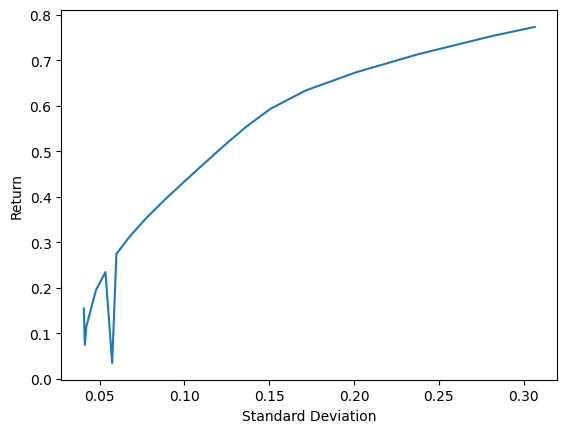

In [ ]:
efficient_frontier = pd.DataFrame({'Return':returns, 'Standard Deviation':std_dev, 'Sharpe Ratio':sr, 'Model':model})
sns.lineplot(efficient_frontier, y='Return', x='Standard Deviation')
plt.show()

### **3. Maximize : Sharpe Ratio**



In [ ]:
result = sp.optimize.minimize(fun=neg_sharpe_ratio_objective,
                            x0= np.array([1/number_of_tickers for _ in range(number_of_tickers)]),
                            args=(log_returns, covariance_matrix),
                            method='SLSQP',
                            bounds=tuple((0,0.3) for _ in range(number_of_tickers)),
                            constraints=({'type': 'eq', 'fun': lambda x: np.sum(x) - 1}))

print(result)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -4.181117185708205
       x: [ 1.127e-12  1.707e-12 ...  1.050e-12  1.480e-12]
     nit: 23
     jac: [ 5.220e+00  3.831e+00 ...  4.648e+00  4.544e+00]
    nfev: 7952
    njev: 23


The optimization ended positively, let's print the results, and largest weights (above 0.01) :

Sharpe Ratio: 4.599
Portfolio Return: 33.0 % 
Portfolio Standard Deviation: 0.072


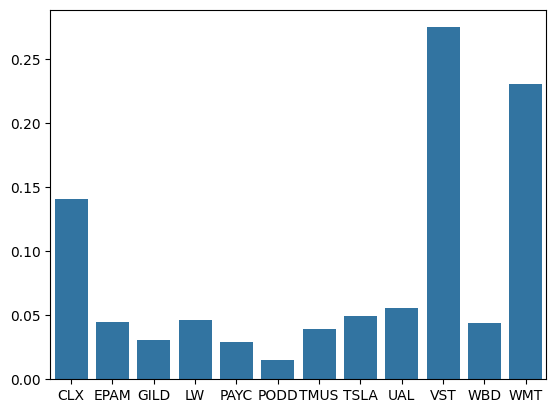

In [ ]:
sharpe_ratio = -1 * result['fun']
weights =  result['x']
portfolio_return = weights @ log_returns
portfolio_std_dev = np.sqrt(weights.T @ covariance_matrix @ weights)
sharpe_ratio = portfolio_return / portfolio_std_dev # calculation the same sharpe ratio for all models

results = pd.concat([results, pd.DataFrame([[portfolio_return, portfolio_std_dev, sharpe_ratio, 'Sharpe ratio optimized']], columns = results.columns)])
print(f"Sharpe Ratio: {sharpe_ratio:.3f}")
print(f"Portfolio Return: {portfolio_return * 100:.1f} % ")
print(f"Portfolio Standard Deviation: {portfolio_std_dev:.3f}")

# Let's plot the Weights > 0.01
sns.barplot(y=weights[weights >= 0.01], x = list(log_returns.index[weights >= 0.01]))
plt.show()

# Compare Results

I will first add to the result the individual asset, (similar to allocating all portfolio to 1 asset).

In [ ]:
l = []
for i in range(len(std_dev_individual_stocks)) :
    l.append([log_returns.iloc[i], std_dev_individual_stocks.iloc[i], log_returns.iloc[i]/std_dev_individual_stocks.iloc[i], 'Individuals'])
results = pd.concat([results, pd.DataFrame(l, columns = results.columns)])

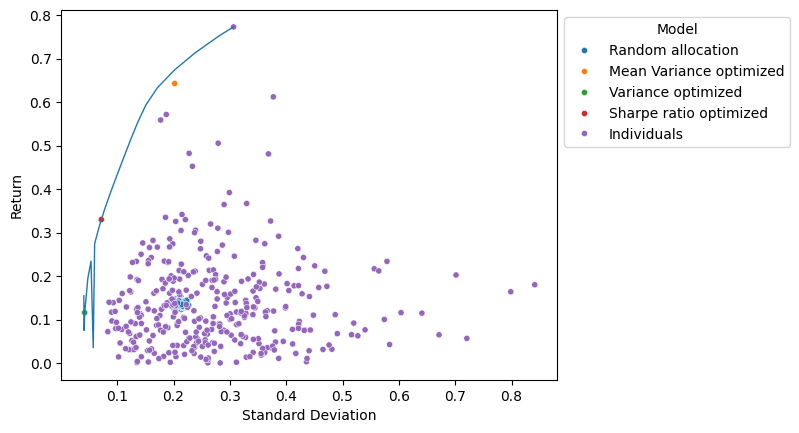

In [ ]:
sns.lineplot(efficient_frontier, y='Return', x='Standard Deviation', linewidth = 1)
ax = sns.scatterplot(results, x='Standard Deviation',  y='Return', hue = 'Model', s = 20)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
group = results.groupby('Model')
display(group.mean())

,Return,Standard Deviation,Sharpe Ratio
Model,,,
Individuals,0.136308,0.273798,0.589663
Mean Variance optimized,0.643126,0.201915,3.185134
Random allocation,0.136318,0.209685,0.650496
Sharpe ratio optimized,0.330035,0.071759,4.599180
Variance optimized,0.115921,0.042246,2.743963


Depending on what you want to achieve : lower the risk, maxime the risk, have a good tradeoff, you can select the strategy you want to apply to your portfolio allocation.


# Conclusion on Portfolio Optimization Approaches
- **Random Allocation**: Simple approach with no specific optimization for risk or return; often used as a baseline, but generally less efficient in managing return-risk trade-offs.
- **Markowitz (Mean-Variance) Optimization**: Balances return and risk by selecting asset weights based on expected returns and correlations, offering a robust strategy but highly dependent on accurate inputs.
- **Minimum Variance**: Prioritizes reducing overall portfolio risk without aiming for high returns, making it ideal for risk-averse investors; however, it may underperform in high-return environments.
- **Sharpe Ratio Optimization**: Focuses on maximizing risk-adjusted returns, providing a balanced approach between risk and return, but sensitive to the reliability of input data on returns and risk.


### Current Limitations
- **Return Estimations**: Based on the previous quarter’s data, potentially misrepresenting future returns.
- **Historical Data Constraint**: Limited to 10 years, which may not capture all informations.
- **Sector Risk Ignorance**: Lacks industry or sector-specific risk assessment, which could impact portfolio resilience.
- **Absence of Sentiment Risk**: Ignores market sentiment, which can affect stock performance unpredictably.

### Next Steps
- **Enhanced Return Estimation**: Implement linear regression to estimate returns and conduct backtesting.
- **Extended Data Analysis**: Use more than 10 years of historical data for a comprehensive view, and run a backtest on the last years.
- **Addressing Survivor Bias**: Include all stocks that were part of the S&P 500 over the last decade in the estimation.
- **Additional Risk Metrics**: Incorporate new metrics to capture industry-specific and sentiment-related risks.

<br>




**Reference:**

Reha H. Tutuncu(s). (2003). Advanced Lecture on Mathematical Science and Information Science I. Retrieved from [URL](https://typeset.io/pdf/advanced-lecture-on-mathematical-science-and-information-4w2ug62u0j.pdf)